In [2]:
import numpy as np
import camb
import matplotlib.pyplot as plt
from camb import model, initialpower
from scipy.integrate import solve_ivp
import scienceplots
plt.style.use(['science', 'bright'])
plt.rcParams.update({
    # Figure
    'figure.figsize': (6.8, 4.2),
    'figure.dpi': 200,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.05,

    # Lines and markers
    'lines.linewidth': 1.5,
    'lines.markersize': 5,

    # Font
    'font.size': 9,
    'axes.labelsize': 9,
    'axes.titlesize': 10,
    'legend.fontsize': 8,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,

    # Axes
    'axes.linewidth': 1.0,
    'axes.grid': True,
    'grid.alpha': 0.3,

    # Ticks
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.size': 4,
    'ytick.major.size': 4,

    # Legend
    'legend.frameon': False,

    # Text rendering (LaTeX)
    'text.usetex': True,               # Optional: needs LaTeX installed
    'text.latex.preamble': r'\usepackage{amsmath,amssymb}',  # Optional
})

## Pregunta 5

Para esta pregunta resolveremos un sistema de ecuaciones diferenciales:

$$
\dot{\delta} = -(1+w) \left( \theta - 3 \dot{\phi}\right) - \mathcal{H} \left( \frac{\delta p}{\rho} - w \delta\right)
$$
$$
\dot{\theta} = -\mathcal{H}(1 - 3 w) \theta - \frac{\dot{w}}{1 + w} \theta + \frac{1}{1+w} \frac{k^2 \delta p}{\rho} + k^2 \psi - k^2 \sigma
$$


Para el caso de componente de materia con $w = \delta p= \sigma = 0$

$$
\dot{\delta }= - \left( \theta - 3 \dot{\phi}\right)
$$
$$
\dot{\theta} = \mathcal{H}\theta + k^2 \psi
$$
Teniendo $\phi = \psi$
$$
\dot{\delta }= - \left( \theta - 3 \dot{\psi}\right)
$$
$$
\dot{\theta} = -\mathcal{H}\theta + k^2 \psi
$$


Ademas por la Eq. $0-0$ y la ecuacion $i-0$ de Einstein:
$$
k^2 \phi  + 3 \mathcal{H} (\mathcal{H} \psi + \dot{\phi}) = -4\pi Ga^2 \delta \rho
$$
$$
k^2(\dot{\phi} + \mathcal{H}\psi) = 4\pi G a^2 (1+w)\bar{\rho} \theta
$$

Que al remplazar una en la otra se obtiene:

$$
k^2 \theta  = -4 \pi G a^2\left(\delta \rho + \frac{3 \mathcal{H}}{k^2}(1 + w)\bar{\rho}\theta\right)
$$

Teniendo que estamos interesados en la la componente de materia

$$
k^2\phi = -4 \pi G a^2 \left( \delta \rho_m + \frac{3 \mathcal{H}}{k^2}\bar{\rho}_m \theta_m\right)
$$
Si reescribimos todo usando $\delta_m$ en lugar de $\delta \rho_m$

$$
k^2 \phi = -\frac{3}{2} a^2 H^2 \Omega_m \left( \delta_m + \frac{3 \mathcal{H}}{k^2} \theta_m \right)
$$

Luego de retomando la ecuacion $i-0$ de einstein

$$
k^2(\dot{\phi} + \mathcal{H}\phi) = 4 \pi G a^2 (1 +w) \bar{\rho} \theta
$$
$$
k^2(\dot{\phi} + \mathcal{H}\phi) = 4 \pi G a^2  \bar{\rho}_m \theta_m
$$

$$
\dot{\phi}  = \frac{3 \mathcal{H}^2}{2k^2} \Omega_m \theta_m - \mathcal{H}\phi
$$


De todo esto tenemos las siguientes ecuaiones a considerar:

$$
\dot{\delta }_m= - \left( \theta_m - 3 \dot{\phi}\right)
$$
$$
\dot{\theta}_m = -\mathcal{H}\theta_m + k^2 \phi
$$
$$
k^2 \phi = -\frac{3}{2} a^2 H^2 \Omega_m \left( \delta_m + \frac{3 \mathcal{H}}{k^2} \theta_m \right)
$$
$$
\dot{\phi}  = \frac{3 \mathcal{H}^2}{2k^2} \Omega_m \theta_m - \mathcal{H}\phi
$$

Luego realizamos un cambio de variable para las derivadas, es decir pasaremos de derivadas en funcion de tiempo conforme $\tau$, a derivadas respecto a el factor de escala $a$.

$$
\delta_m'= - \left( \frac{\theta_m}{a^2 H} - 3 \phi'\right)
$$
$$
\theta_m' = -\frac{\theta_m}{a} + \frac{k^2 \phi}{a^2 H}
$$
$$
k^2 \phi = -\frac{3}{2} a^2 H^2 \Omega_m \left( \delta_m + \frac{3 \mathcal{H}}{k^2} \theta_m \right)
$$
$$
\phi'  = \frac{3 H}{2k^2} \Omega_m \theta_m - \frac{\phi}{a}
$$


In [23]:
# Primero definimos el parametro de Hubble
w_de = -1
omega_r = 1e-4
omega_m = 0.3
omega_lambda =  (1 - omega_r - omega_m)
h0 = 67

def H_a(a):
     return (h0)*(omega_r*a**(-4) + omega_m*a**(-3) + omega_lambda*a**(-3*(1+w_de)))**(0.5)

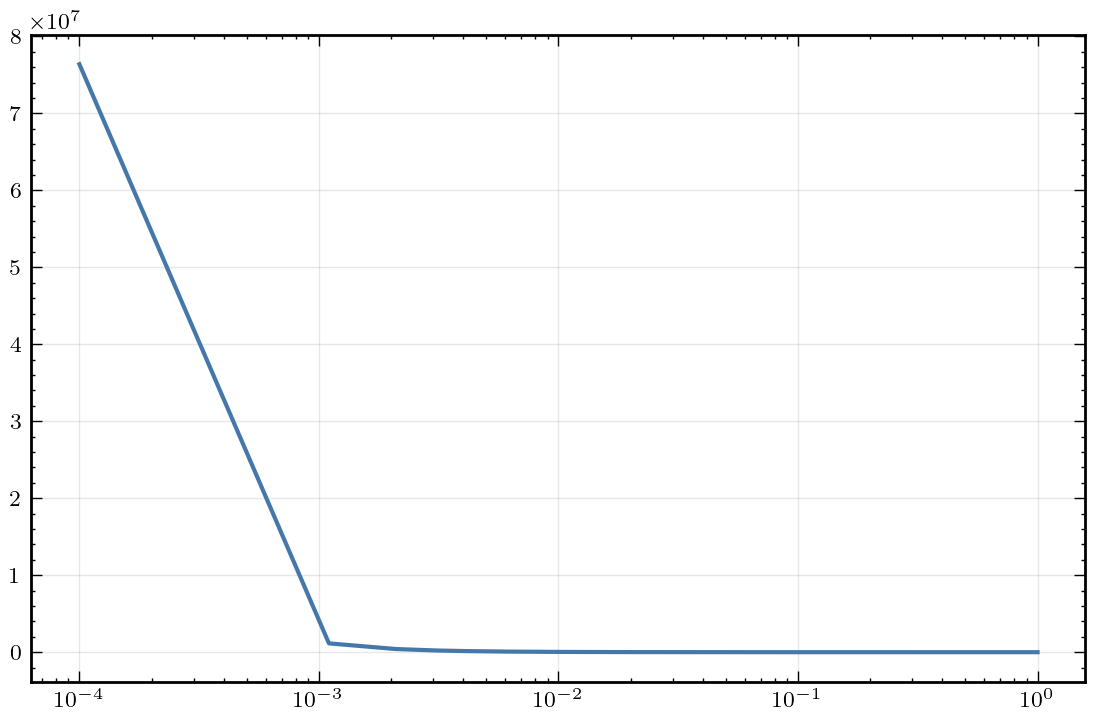

In [24]:
a = np.linspace(1e-4, 1,1000)
# Aqui ploteamos el paramtro de Hubble en tiempo cosmico y en tiempo conforme
plt.semilogx(a, H_a(a))

In [35]:
def phi(a, k ,init_val):

    delta_m, theta_m  = init_val
    

    term1 = -1.5 *(a*H_a(a)/k)**2 
    term2 = omega_m*(a**(-3))*(delta_m/a + (3*H_a(a)/k**2)*theta_m )

    return term1*term2



def dphida(a, k, init_val):

    delta_m, theta_m = init_val
    term1 = 1.5*H_a(a)/(2 *k**2)
    term2 = omega_m*theta_m*a**(-3)

    return term1*term2 - phi(a,k,init_val)/a

def rhs_edos(a, k, init_val):
    delta_m, theta_m = init_val
    phi_f = phi(a, k , init_val)
    dphida_f = dphida(a, k, init_val)

    out = [
        -theta_m/(a**2 * H_a(a)) + 3*dphida_f,
        -theta_m/a + k**2 * phi_f/(a**2*H_a(a))
    ]

    return out

In [56]:
a_ini, a_end = 1e-4, 1.0
X0 = [a_ini, - H_a(a_ini)*a_ini**2 ]

k_list = np.array([10**(-3), 10**(-1), 1, 50])

X_sol = {}

for k in k_list:
    X_sol[k] = solve_ivp(
        fun = lambda a, X: rhs_edos(a, k, X),
        t_span= (a_ini, a_end),
        y0 = X0,
        method = 'BDF',
        dense_output= True,
        rtol = 1e-7,
        atol=1e-10
    )


In [57]:
for i in k_list[1]:
    print(X_sol[i])


TypeError: 'numpy.float64' object is not iterable

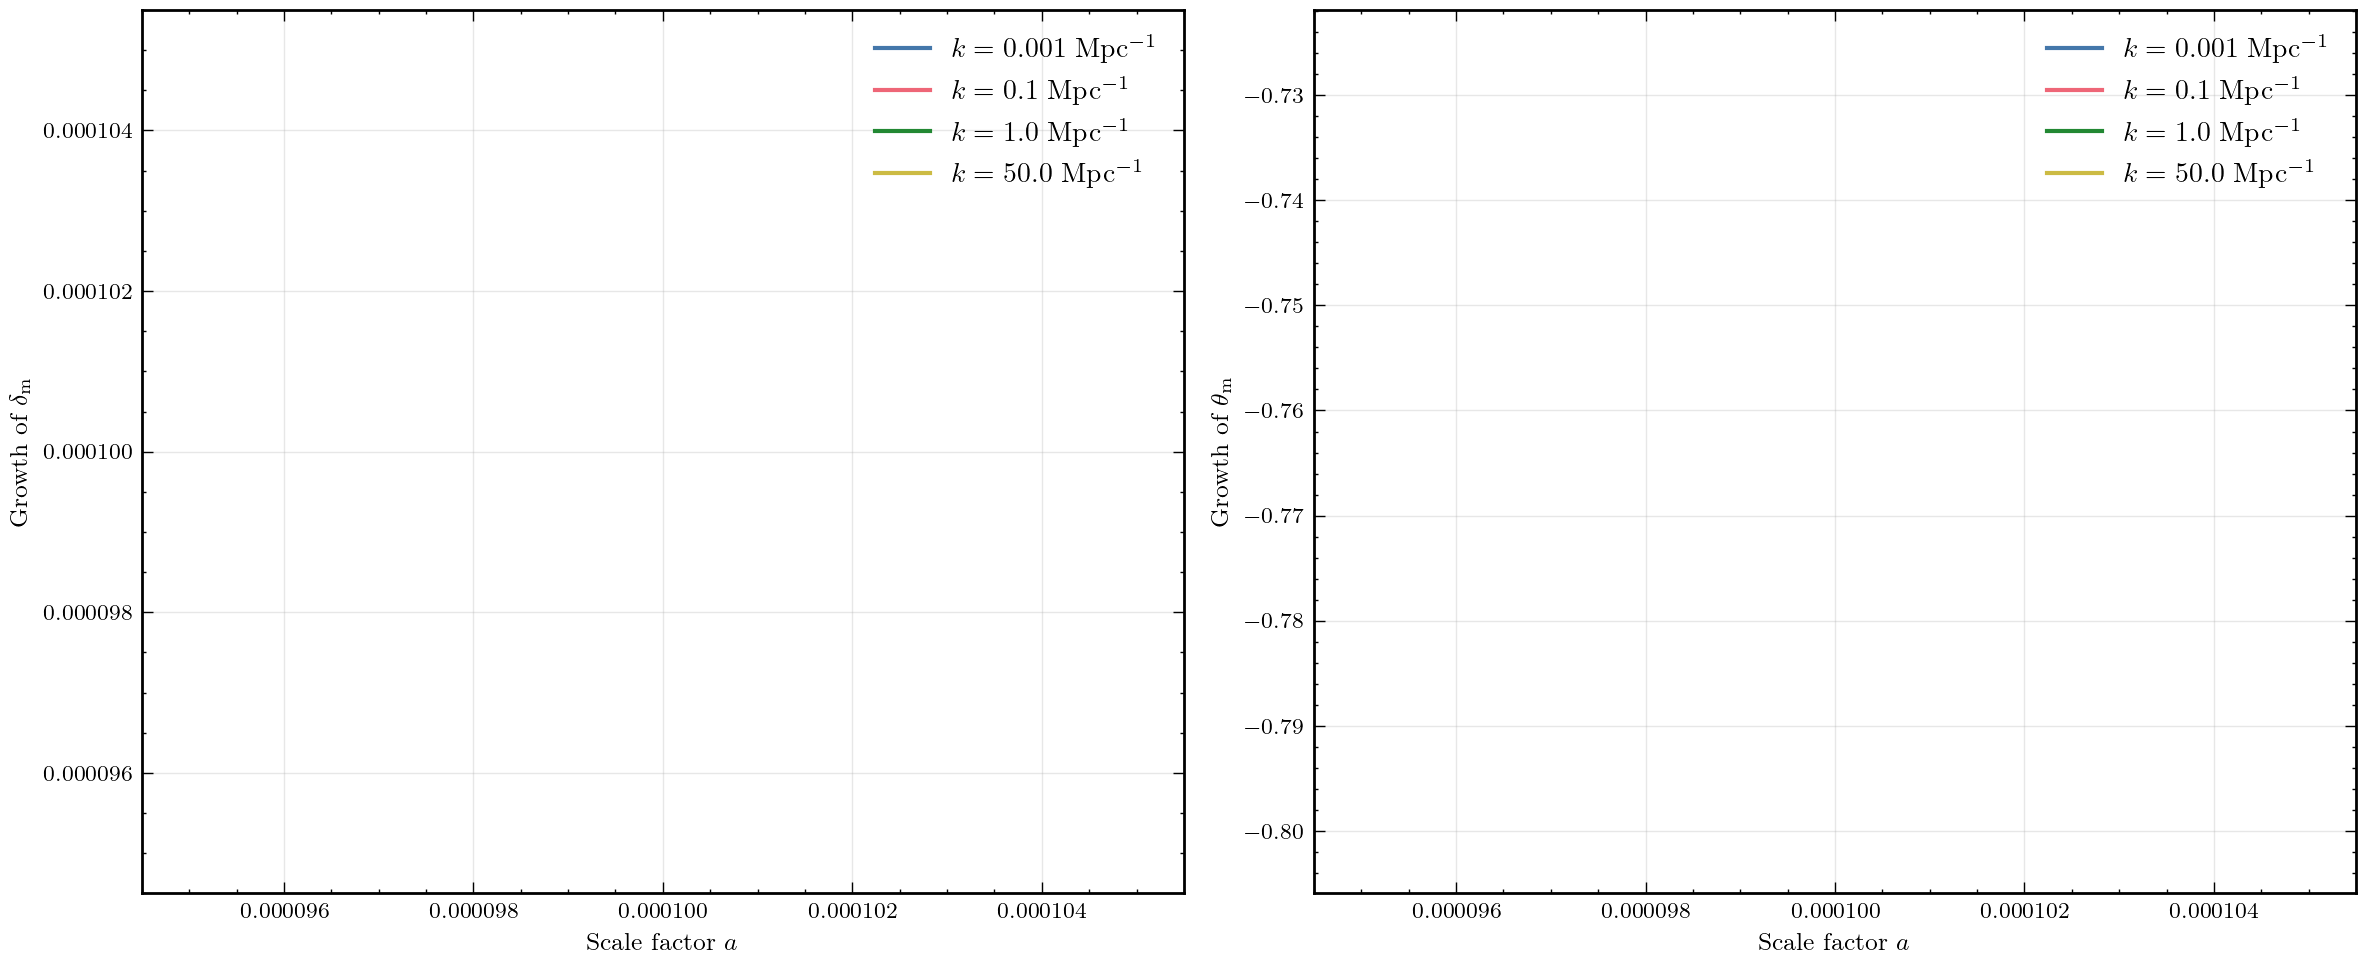

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

for idx, k in enumerate(k_list):
    ax[0].plot(X_sol[k].t, X_sol[k].y[0], label=fr'$k={k}$ Mpc'r'$^{-1}$')
    ax[1].plot(X_sol[k].t, X_sol[k].y[1], label=fr'$k={k}$ Mpc'r'$^{-1}$')

# Axis labels
ax[0].set_xlabel(r'Scale factor $a$')
ax[1].set_xlabel(r'Scale factor $a$')
ax[0].set_ylabel(r'Growth of $\delta_\mathrm{m}$')
ax[1].set_ylabel(r'Growth of $\theta_\mathrm{m}$')

# Legends
ax[0].legend(fontsize=10)
ax[1].legend(fontsize=10)

# Layout
fig.tight_layout()

## Pregunta 6

### a)

Para resolver este problema, consideramos dos sets de parametros distintos para CAMB. Uno en el fijamos el valor de $H_{0} = 67.0$, y el otro en el que ademas fijamos el valor de $\Omega_{\nu}h^2 = 0$.
Calculamos el Matter power spectra de estos dos sets de parametros para el siguiente conjunto de redshift $z = \left\{ 0.0, 0.8, 0.20\right\}$.

In [3]:
pars = camb.set_params(H0 = 67)
pars2 = camb.set_params(H0= 67, omnuh2 = 0)

pars.set_matter_power(redshifts=[0.0, 0.8, 1.2], kmax = 2.0)
pars2.set_matter_power(redshifts=[0.0, 0.8, 1.2], kmax = 2.0)

results = camb.get_results(pars)
results2 = camb.get_results(pars2)

kh, z, pk  = results.get_matter_power_spectrum(minkh= 1e-4, maxkh= 1,npoints=200)
kh2, z2, pk2  = results2.get_matter_power_spectrum(minkh= 1e-4, maxkh= 1,npoints=200)



Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)


In [4]:
print(results.get_Omega('nu'),results2.get_Omega('nu'))

0.0014365483859376585 0.0


Finalmente son calculados y ploteados los matter power spectra, para cada uno de los valores de $z$, asi como para cada espacio de parametros fijos.

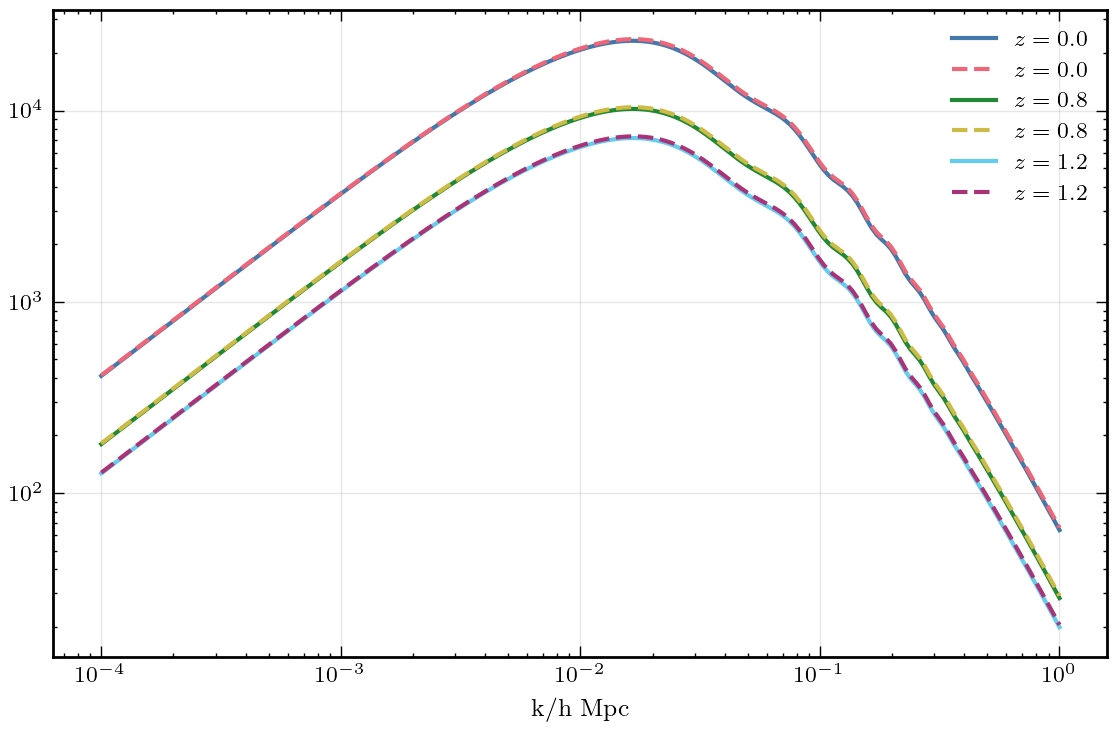

In [5]:
for i, (redshift) in enumerate(z):
    plt.loglog(kh, pk[i,:], label = rf'$z = {redshift}$')
    plt.loglog(kh2, pk2[i,:],'--' ,label = rf'$z = {redshift}$')

plt.xlabel('k/h Mpc')
plt.legend()


Al comparar el resultado etre los casos con distintos parametro $\Omega_{\mu}h^2$, y calcular el ratio entre ambas resultados $P_1(k)/P_{2}(k)$, se obtiene un comportamiento que cambia con el valor de la espala $k$, asimismo su ratio  se  mantiene estable para valores de $k$ bajos. Sin embargo despues de cierto valor de $k$, este ratio empieza a decaer, mostrandonos que la diferencia, al fijar el parametro respecto a la densidad de $\nu$, aumenta ligeramente el valor del matter power spectra. Ademas,

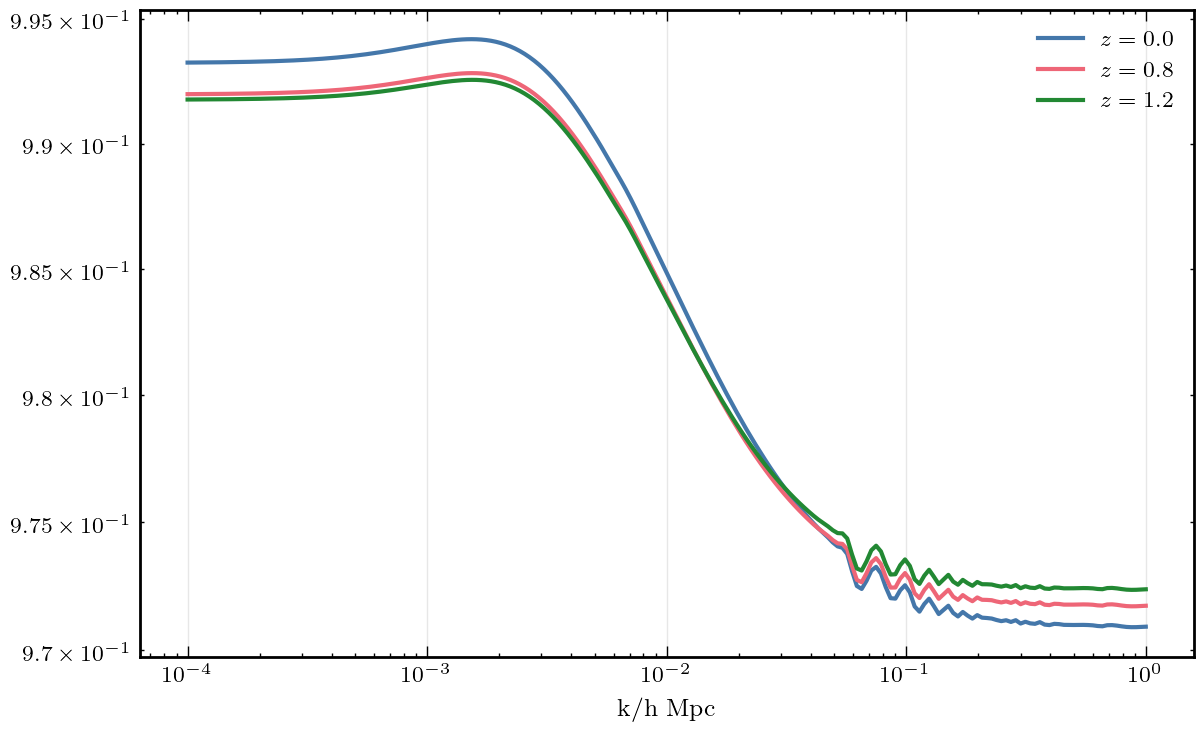

In [6]:
for i, (redshift) in enumerate(z):
    plt.loglog(kh, pk[i,:]/pk2[i,:], label = rf'$z = {redshift}$')

plt.xlabel('k/h Mpc')
plt.legend()


### b)

In [7]:
pars = camb.set_params(H0=67,lmax=3000)

results =camb.get_results(pars)

powers = results.get_cmb_power_spectra(pars , CMB_unit='muK')
powers.keys()

dict_keys(['total', 'unlensed_scalar', 'unlensed_total', 'lensed_scalar', 'tensor', 'lens_potential'])

(2.0, 3000.0)

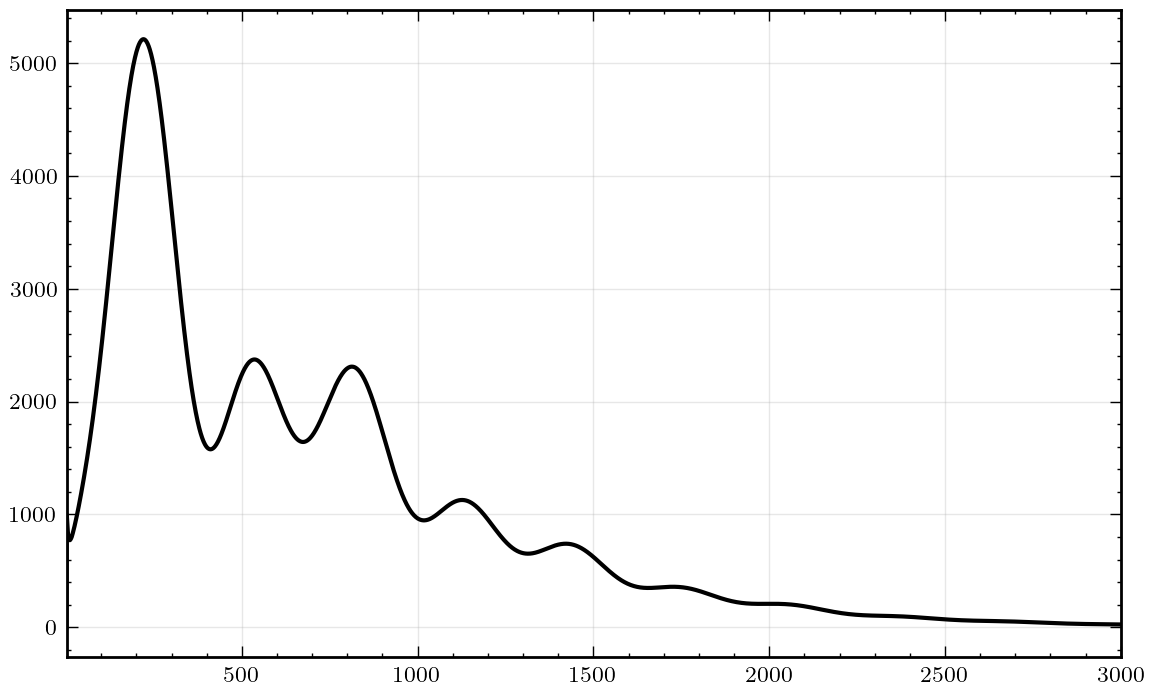

In [8]:
totcl = powers['total']
ls = np.arange(totcl.shape[0])


plt.plot(ls, totcl[:,0], color = 'k')
plt.xlim(2,3000)


Para mostrar como cambia el angular power spectrum con la seleccion de parametros cosmologicos definimos

In [9]:
def power_spectra(ombh2=0.022, omch2=0.122, omk =0):
    pars = camb.set_params(H0=67,lmax=3000, ombh2=ombh2, omch2=omch2,omk  = omk)

    results =camb.get_results(pars)

    powers = results.get_cmb_power_spectra(pars , CMB_unit='muK')

    total = powers['total']

    return total




El efecto del parametro $\Omega_{b}$ sobre el angular power spectrum del CMB esta sobre todo en la amplitud de las oscilaciones acusticas despues del primer peak. Esto de debe a que reducir el valor del parametro deja menos baryones para interactuar con fotones antes de la recombinancion creando un efecto de damping. Pero notemos que esto ocurre para valores mas pequenos que un treshold, pues al empezar a reducirlo, en primera instancia los peaks secundarios empiezan a subir, sin embargo para el valor mas bajo, la amplitud de los peaks secundarios se ve reducida considerablemente.  En general ademas, el cambio de la densidad de bariones influye en el calculo de la sound speed $c_{s}$ y por tanto en el sound horizon, afectando tambien el valor del multipolo $\ell$ sobre el que cada valor del angular power spectrum se encuentra, logrando una especie de shift, aunque en este caso, para los valores probados, este efecto es minimo.

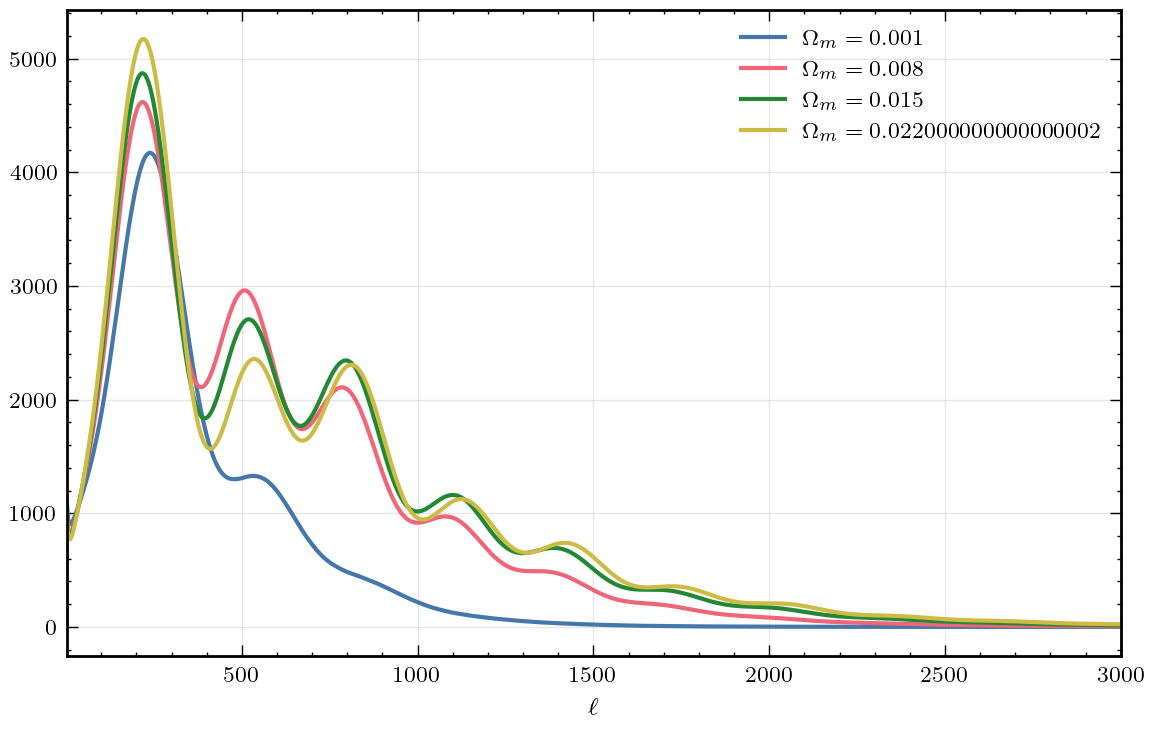

In [ ]:
omeb_list = np.arange(0.001,0.023,0.007)
for omeb in omeb_list:
    total = power_spectra(ombh2=omeb)
    ls = np.arange(total.shape[0])
    plt.plot(ls, total[:,0], label = rf'$\Omega_b = {omeb}$')


plt.xlabel(r'$\ell$')
plt.xlim(2,3000)
plt.legend()

El efecto que tiene el valor de $\Omega_{k}$ sobre el angular power espectra es sobre todo geometrico, pues al incrementar este valor estamos asumiendo una geometria diferente para el universo. Particularmente se manifiesta en la forma en la que viaja la luz atravez del universo, cambia la trayectoria de la luz. Siendo ese el caso, se ve afectada nuestra manera de medir el angulo sobre el cual estamos calculando la amplitud de la funcion de correlacion. Es por eso que con este cambio, se conserva la forma del angular power spectrum, y solo se ve afectada su ubicacion en el eje $x$ que representa el multipolo asociado al angulo de observacion seleccionado.

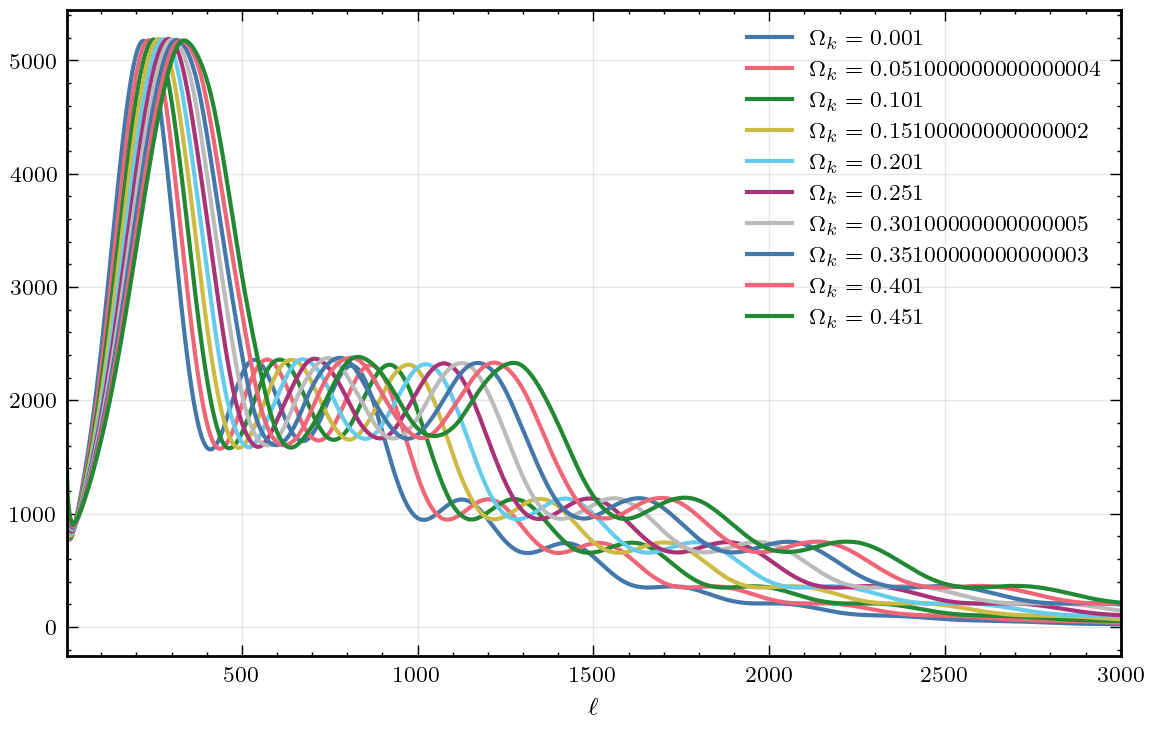

In [16]:
omk_list = np.arange(0.001,0.5,0.05)
for omek in omk_list:
    total = power_spectra(omk=omek)
    ls = np.arange(total.shape[0])
    plt.plot(ls, total[:,0], label = rf'$\Omega_k = {omek}$')


plt.xlabel(r'$\ell$')
plt.xlim(2,3000)
plt.legend()